In [18]:
#https://www.kaggle.com/enerrio/scikit-learn-ml-from-start-to-finish

#Machine Learning dari Awal hingga Akhir dengan Scikit-Learn
#Notebook ini mencakup proses Pembelajaran Mesin dasar dengan 
#Python langkah demi langkah. 
#Berawal dari data mentah ke setidaknya 78% akurasi pada dataset Titanic Survivors

#Langkah-langkah
#Mengimpor DataFrame
#Visualisasikan Data
#Bersihkan dan Transformasikan Data
#Encode Data
#Pelatihan Split dan Set Tes
#Algoritma Fine Tune
#Validasi Silang dengan KFold
#Unggah ke Kaggle

#File CSV dapat dimuat ke dalam dataframe dengan memanggil pd.read_csv. 
#Setelah memuat file pelatihan dan tes, cetak sampel untuk melihat apa yang Anda kerjakan.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('c:/data/train.csv')
data_test = pd.read_csv('c:/data/test.csv')

data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S


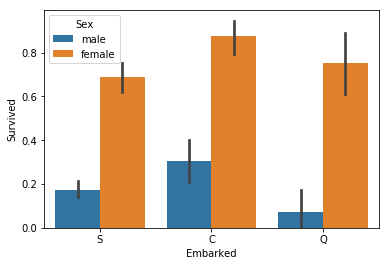

In [19]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

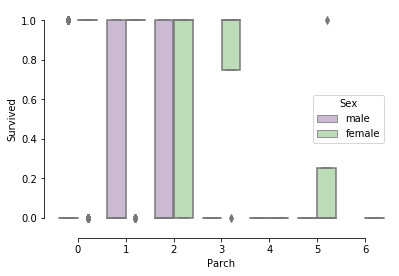

In [20]:
sns.boxplot(x="Parch", y="Survived", hue="Sex", data=data_train, palette="PRGn");
sns.despine(offset=10, trim=True)

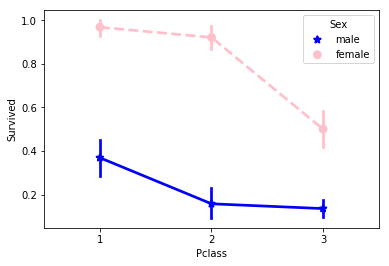

In [21]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train, 
             palette={"male":"blue", "female" : "pink"},
             markers=["*", "o"], linestyles=["-", "--"]);
            

In [22]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


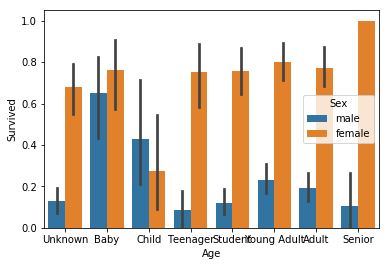

In [23]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

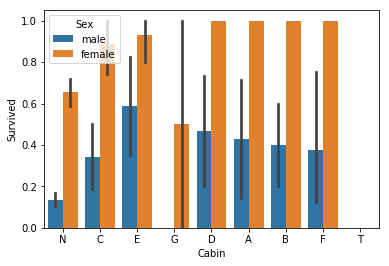

In [24]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train);

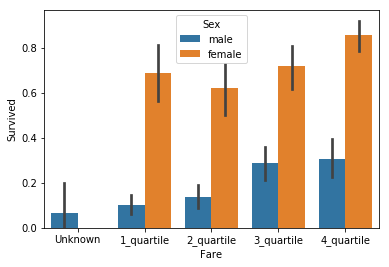

In [25]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train);

In [26]:
#Beberapa Enkode Akhir Bagian terakhir dari fase preprocessing adalah menormalkan label. 
#The LabelEncoder dalam Scikit-learn akan mengubah setiap nilai string unik menjadi angka, 
#membuat data lebih fleksibel untuk berbagai algoritma. 
#Hasilnya adalah tabel angka yang tampak menakutkan bagi manusia, tetapi indah untuk mesin.

from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
                
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [32]:
#Memisahkan Data Pelatihan
#Sekarang saatnya untuk beberapa Machine Learning.
#Pertama, pisahkan fitur (X) dari label (y).
#X_all: Semua fitur dikurangi nilai yang ingin kami prediksikan (Bertahan).
#y_all: Hanya nilai yang ingin kami prediksi.
#Kedua, gunakan Scikit-learn untuk secara acak mengacak data ini menjadi empat variabel. 
#Dalam hal ini, saya melatih 80% data, lalu menguji dengan 20% lainnya.
#Kemudian, data ini akan disusun kembali menjadi pola KFold untuk memvalidasi 
#efektivitas dari algoritma yang terlatih.

from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [33]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.7666666666666667
Fold 2 accuracy: 0.8202247191011236
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.797752808988764
Fold 5 accuracy: 0.8651685393258427
Fold 6 accuracy: 0.8089887640449438
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.8089887640449438
Fold 9 accuracy: 0.797752808988764
Fold 10 accuracy: 0.797752808988764
Mean Accuracy: 0.801385767790262


In [34]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
